In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ax_dims = (20,12)

sns.set()
%matplotlib inline

## Read the http hourly requests in a time series

In [2]:
df = pd.read_csv('requests_ts.csv', parse_dates=['timestamp'], index_col='timestamp')
request_series = pd.Series(df['requests'])
request_series.head()

timestamp
1995-06-01 00:00:00    65
1995-06-01 01:00:00    16
1995-06-01 02:00:00    37
1995-06-01 03:00:00    76
1995-06-01 04:00:00    57
Name: requests, dtype: int64

## 24 Hour rolling mean

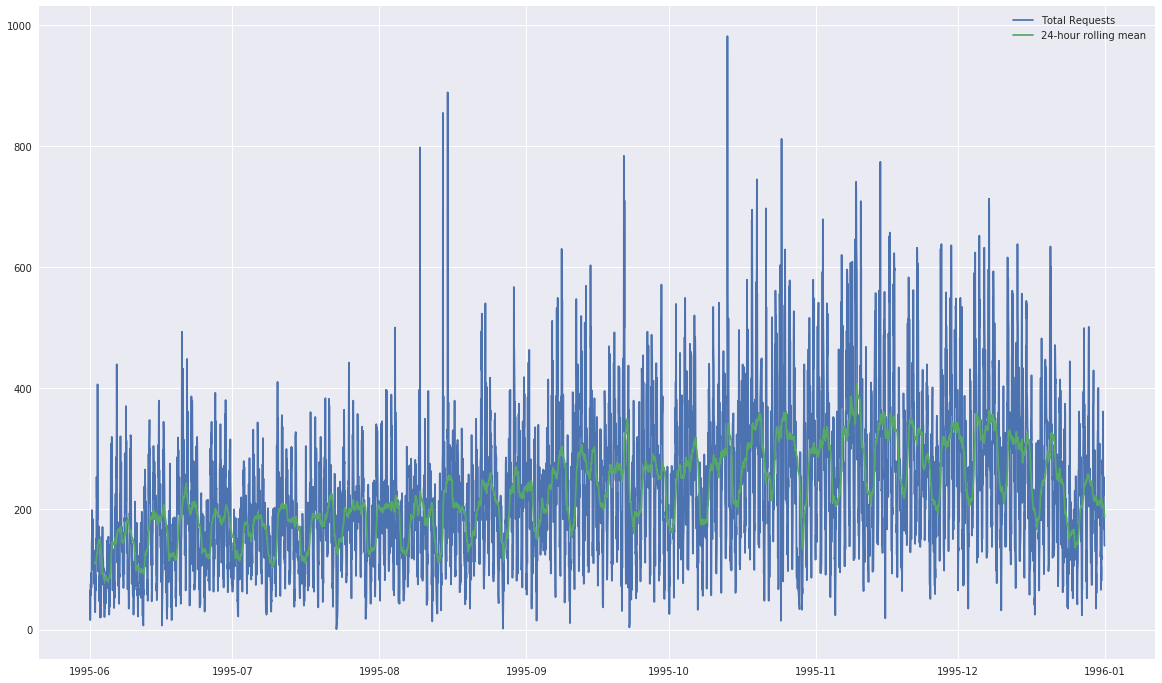

In [3]:
rolling_mean = request_series.rolling(window=24).mean() 

plt.figure(figsize = ax_dims)
plt.plot(request_series)
plt.plot(rolling_mean)
plt.legend(['Total Requests','24-hour rolling mean']);

## Detrending the log of the series

timestamp
1995-06-03 04:00:00   -1.741896
1995-06-12 05:00:00   -2.168491
1995-06-12 06:00:00   -2.332425
1995-06-16 04:00:00   -3.120967
1995-06-17 05:00:00   -1.893495
1995-06-18 05:00:00   -1.899967
1995-07-08 05:00:00   -1.711451
1995-07-22 23:00:00   -4.623822
1995-07-29 03:00:00   -2.238924
1995-08-12 04:00:00   -2.521137
1995-08-27 02:00:00   -4.007971
1995-09-02 03:00:00   -1.797853
1995-09-03 04:00:00   -2.165560
1995-09-09 02:00:00   -1.662593
1995-09-10 05:00:00   -2.605760
1995-09-21 04:00:00   -1.931521
1995-09-22 17:00:00   -3.912065
1995-09-22 18:00:00   -3.724227
1995-09-22 20:00:00   -2.662375
1995-09-28 00:00:00   -1.644233
1995-10-01 04:00:00   -1.758264
1995-10-07 04:00:00   -1.966397
1995-10-21 05:00:00   -1.638521
1995-10-24 17:00:00   -2.827040
1995-10-28 15:00:00   -1.762382
1995-11-05 04:00:00   -1.982661
1995-11-15 17:00:00   -2.675673
1995-12-03 05:00:00   -1.665065
1995-12-10 04:00:00   -1.812343
1995-12-17 06:00:00   -1.864118
1995-12-27 04:00:00   -1.95588

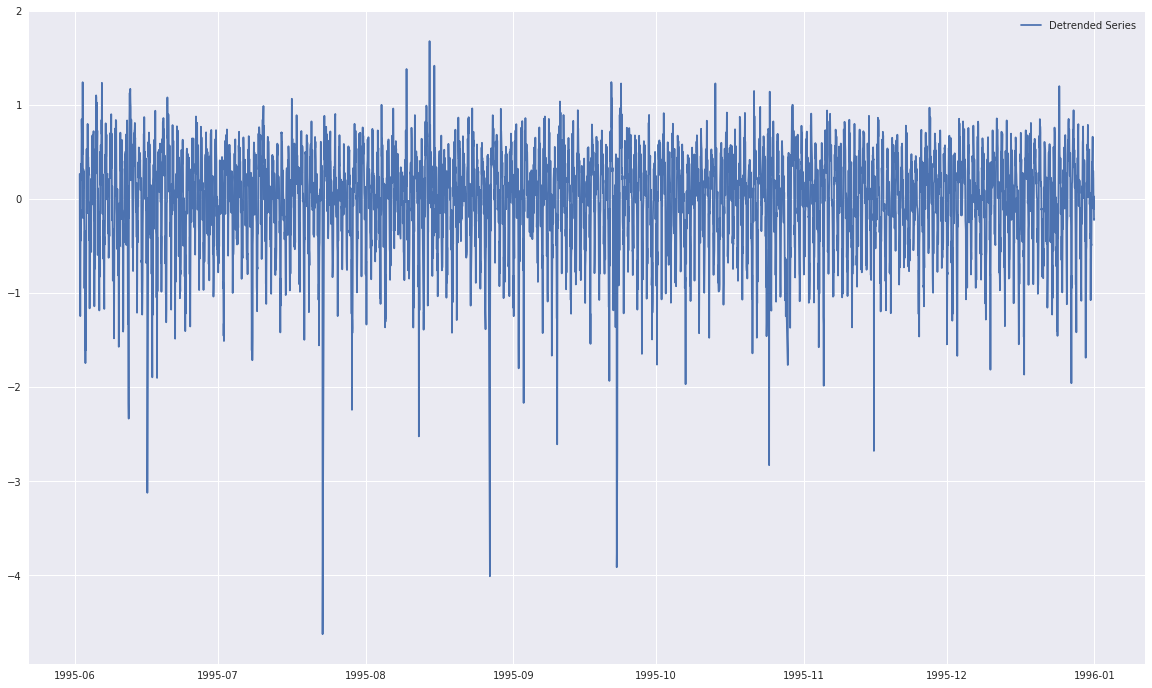

In [4]:
log_series = np.log(request_series)
log_rolling_mean = log_series.rolling(window=24).mean() 

detrended_series = (log_series - log_rolling_mean).dropna()

plt.figure(figsize = ax_dims)
plt.plot(detrended_series)
plt.legend(['Detrended Series']);

detrended_series[np.mean(detrended_series) - detrended_series > np.std(detrended_series) * 3]

## Differencing the log of the series

183

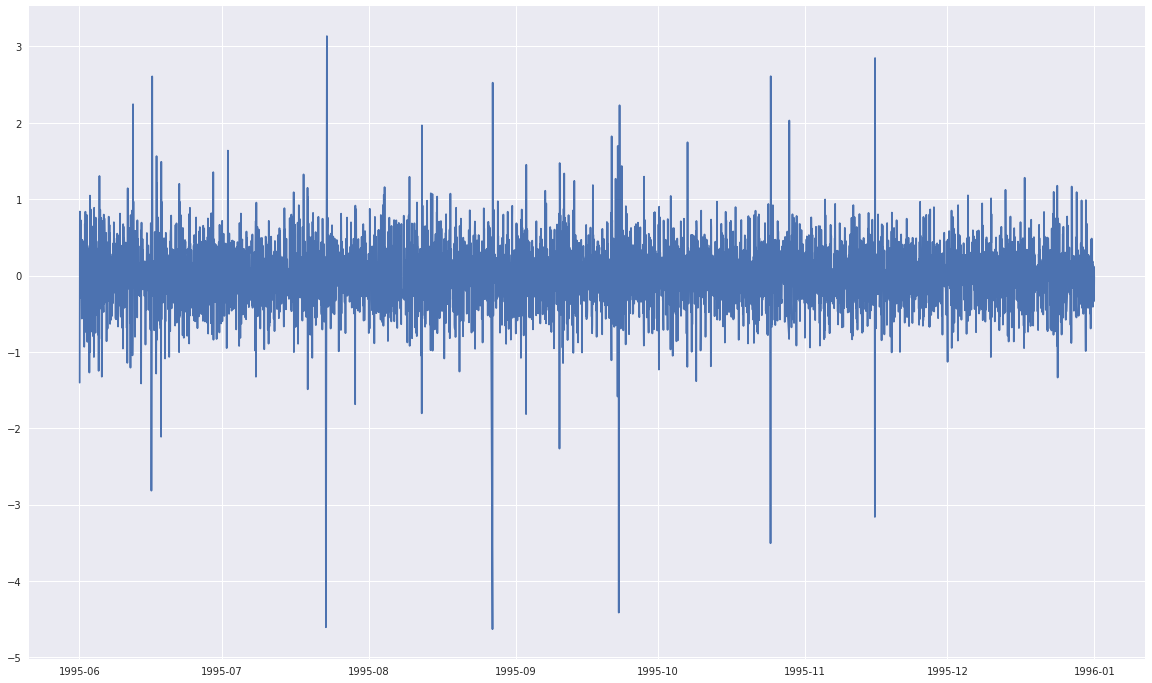

In [5]:
log_series_diff = log_series.diff() 

plt.figure(figsize = ax_dims)
plt.plot(log_series_diff);
log_series_diff[np.abs(np.mean(log_series_diff) - log_series_diff) > \
                np.std(log_series_diff) * 2].count()

In [6]:
df.head()

requests
timestamp                    
1995-06-01 00:00:00        65
1995-06-01 01:00:00        16
1995-06-01 02:00:00        37
1995-06-01 03:00:00        76
1995-06-01 04:00:00        57

In [7]:
import statsmodels.api as sm

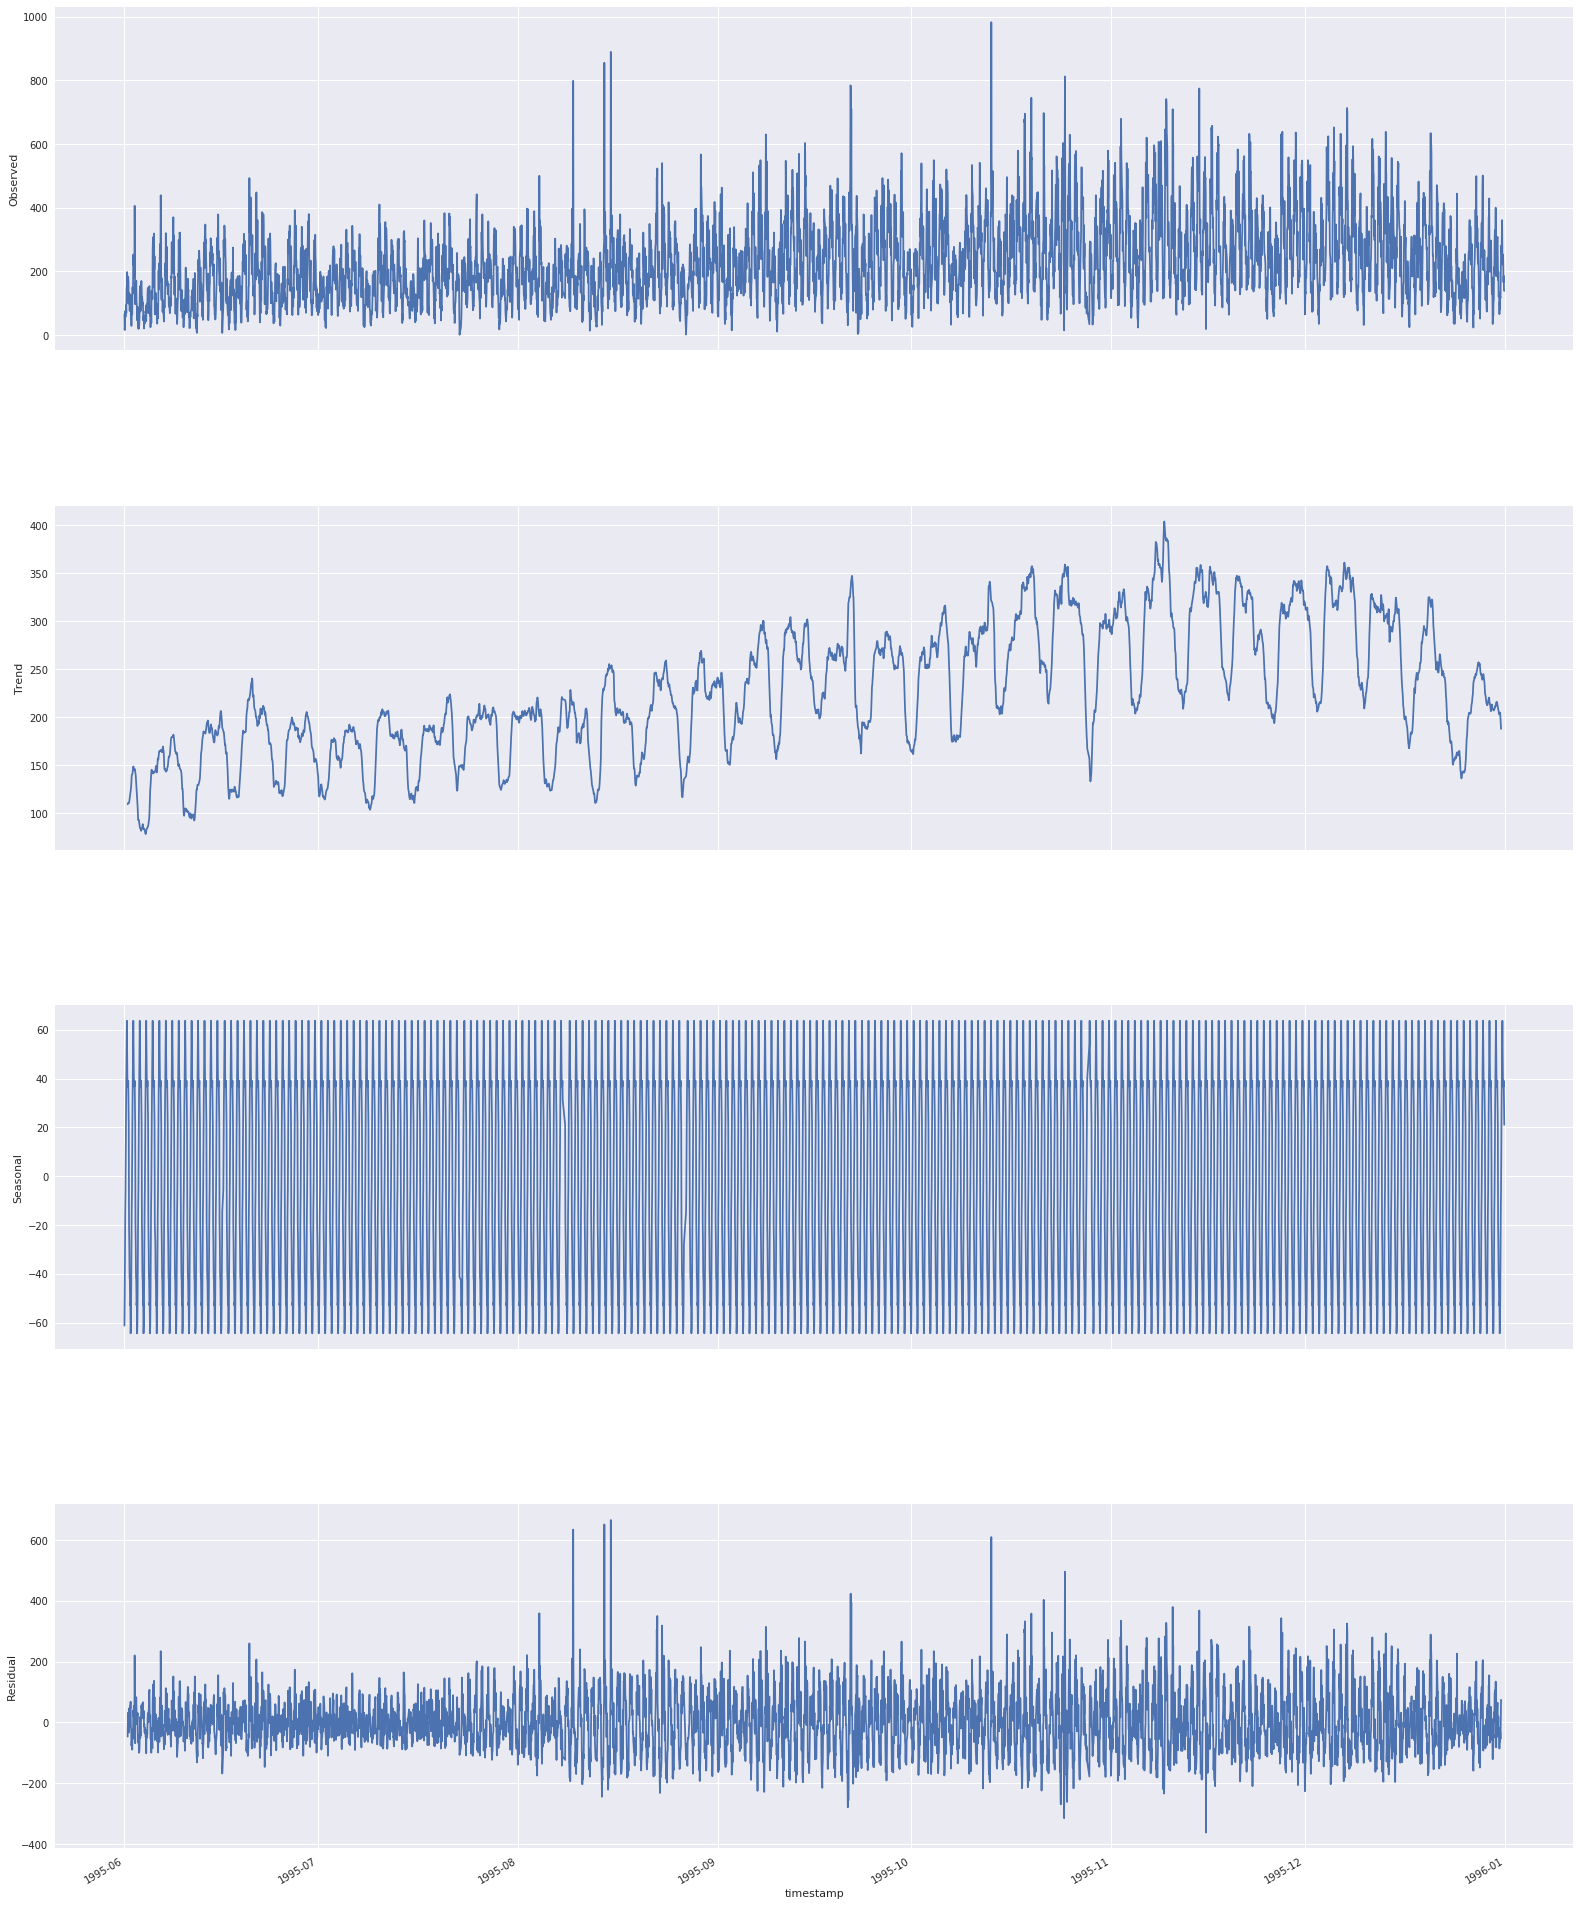

In [8]:
res = sm.tsa.seasonal_decompose(df, freq = 24)
resplot = res.plot()
resplot.set_size_inches(25, 35)

## Perform Dickey Fuller Test

In [9]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=24)
    rolstd = pd.rolling_std(timeseries, window=24)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(20, 12))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  """
/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()
  


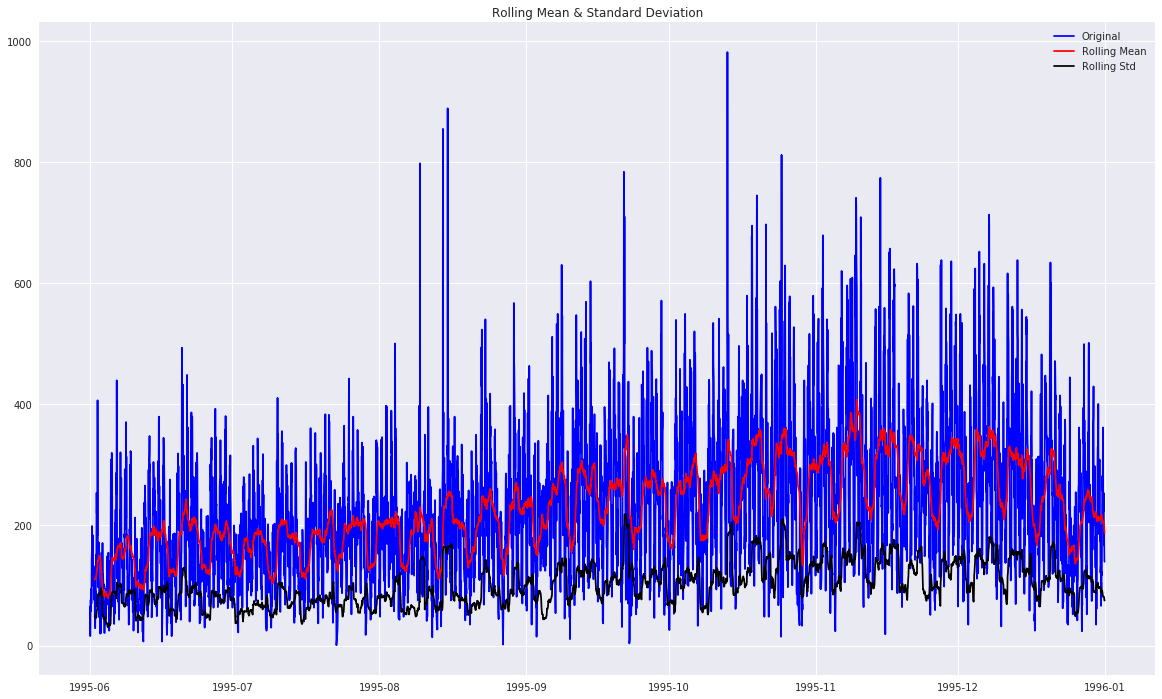

Results of Dickey-Fuller Test:
Test Statistic                -6.056721e+00
p-value                        1.240091e-07
#Lags Used                     3.200000e+01
Number of Observations Used    5.072000e+03
Critical Value (1%)           -3.431640e+00
Critical Value (5%)           -2.862110e+00
Critical Value (10%)          -2.567073e+00
dtype: float64


In [10]:
test_stationarity(request_series)

/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  """
/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()
  


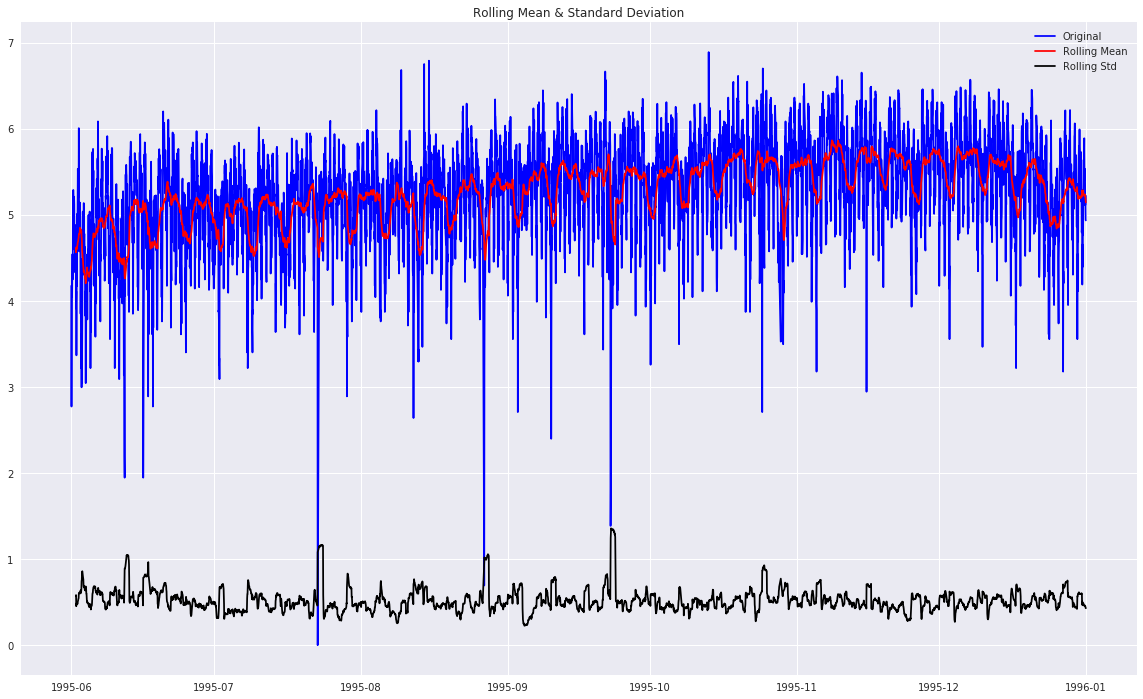

Results of Dickey-Fuller Test:
Test Statistic                -6.360334e+00
p-value                        2.483544e-08
#Lags Used                     3.100000e+01
Number of Observations Used    5.073000e+03
Critical Value (1%)           -3.431640e+00
Critical Value (5%)           -2.862110e+00
Critical Value (10%)          -2.567073e+00
dtype: float64


In [11]:
test_stationarity(log_series)

## Plot the ACF and PACF charts and find the optimal parameters


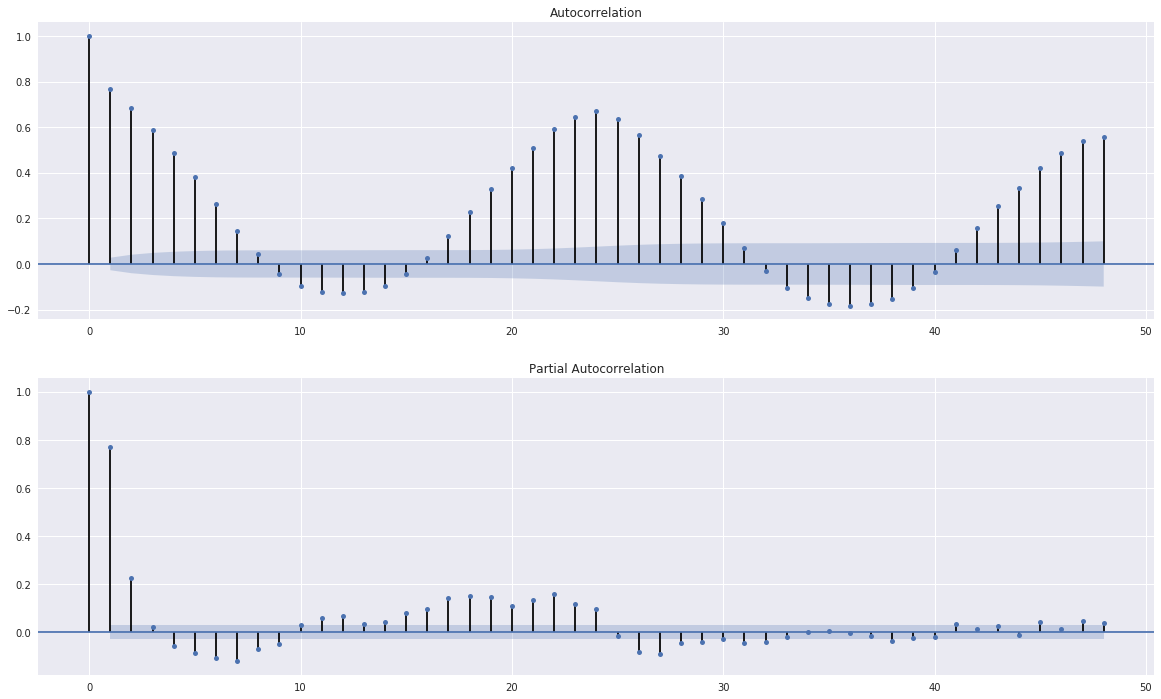

In [12]:
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(request_series, lags=48, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(request_series, lags=48, ax=ax2)

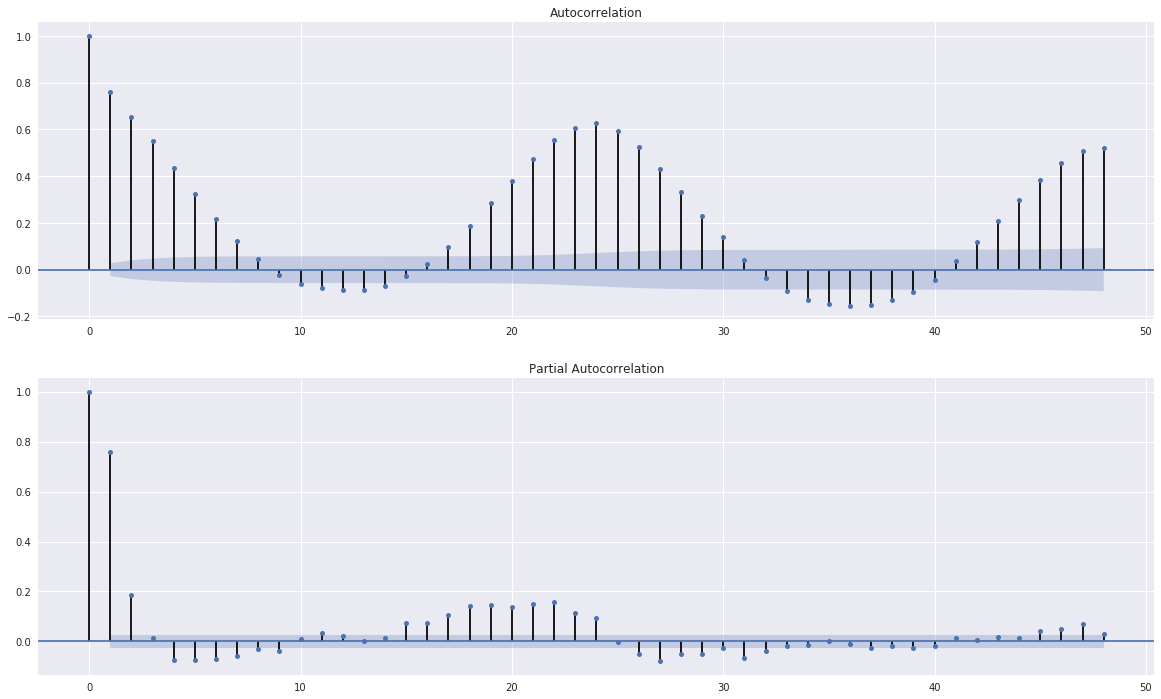

In [13]:
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(log_series, lags=48, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(log_series, lags=48, ax=ax2)

## Build model

In [70]:
mod = sm.tsa.statespace.SARIMAX(df.requests, trend='n', order=(6,1,6), seasonal_order=(3,1,3,24))
results = mod.fit()
print(results.summary())


/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                           requests   No. Observations:                 5105
Model:             SARIMAX(6, 1, 6)x(3, 1, 3, 24)   Log Likelihood              -28857.766
Date:                            Tue, 19 Jun 2018   AIC                          57753.532
Time:                                    13:54:04   BIC                          57877.660
Sample:                                         0   HQIC                         57797.002
                                           - 5105                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.7961      6.605     -0.423      0.672     -15.743      10.150
ar.L2         -2.0114     12.620   

## Make Predictions

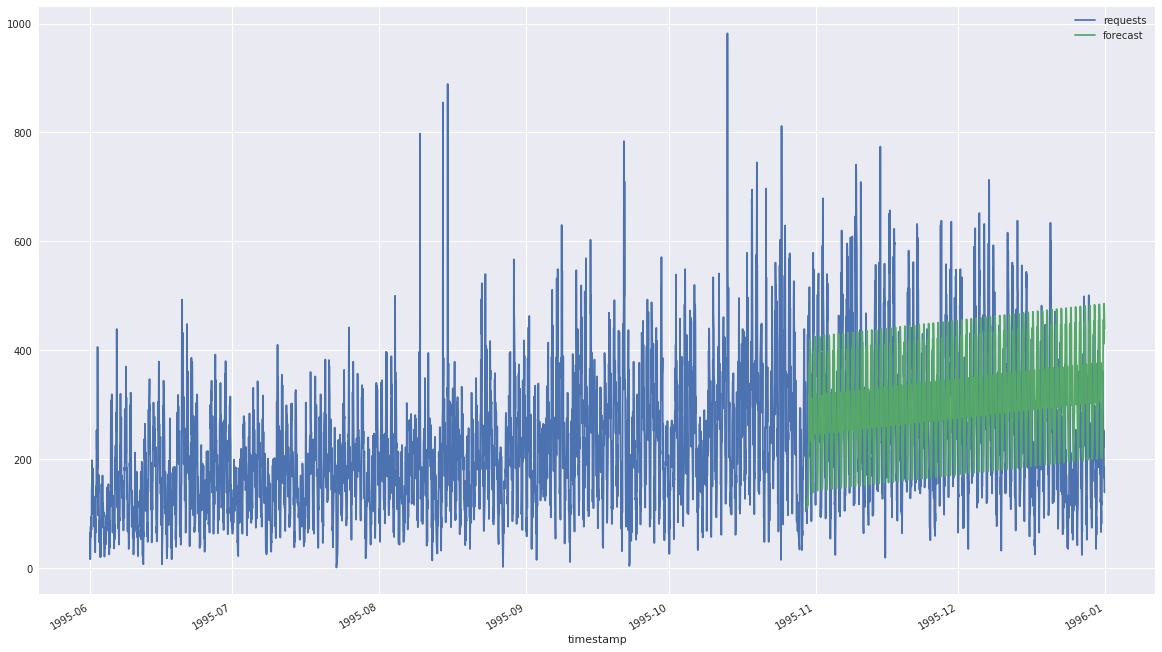

In [40]:
df['forecast'] = results.predict(start = 3600, end= 5104, dynamic= True)  
df[['requests', 'forecast']].plot(figsize=(20, 12))

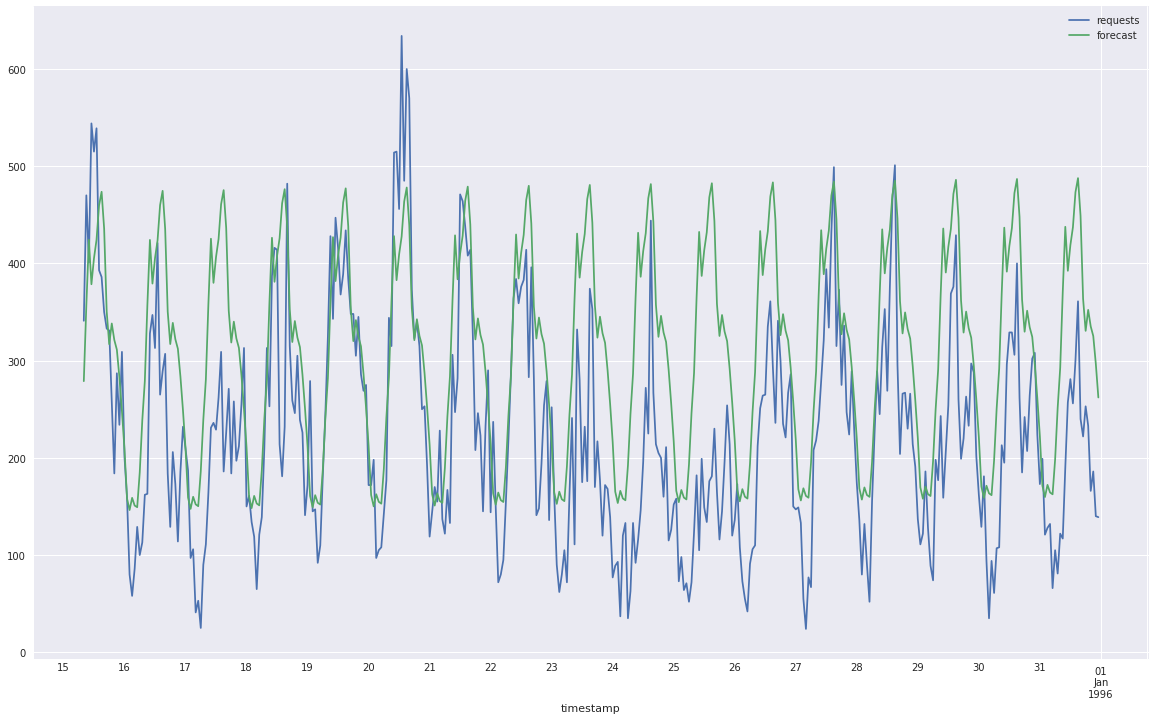

In [18]:
df['forecast'] = results.predict(start = 4600, end= 5104, dynamic= True)  
df[['requests', 'forecast']][-400:].plot(figsize=(20, 12))

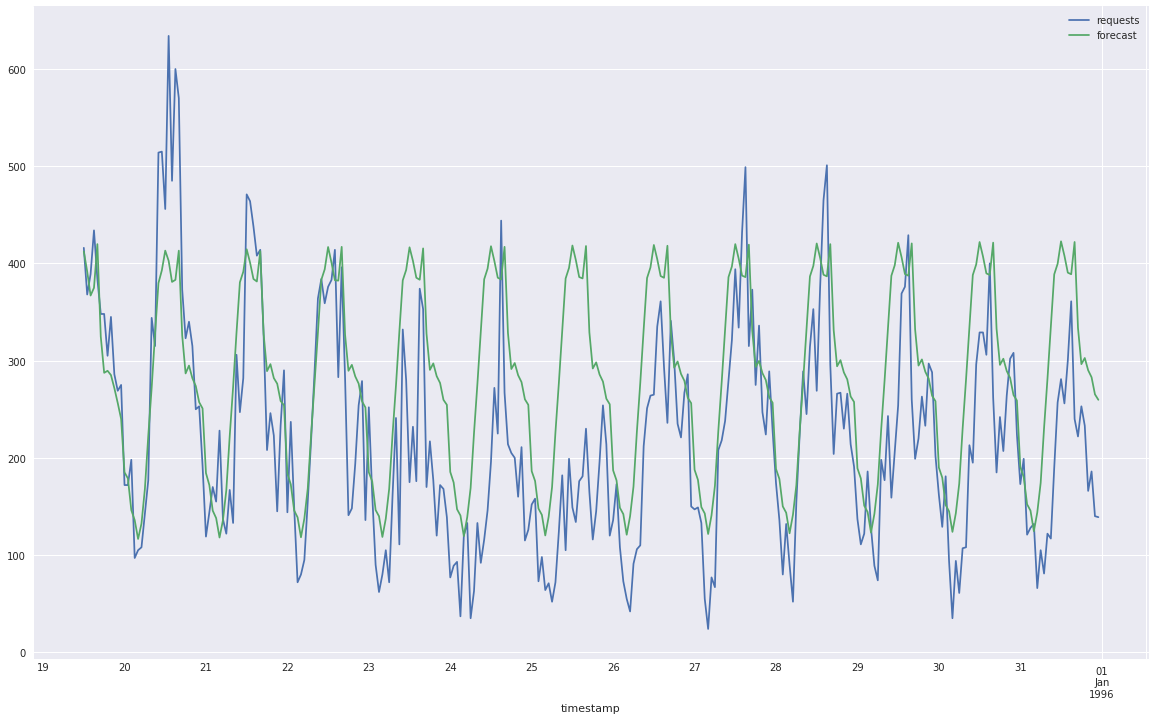

In [19]:
df['forecast'] = results.predict(start = 4800, end= 5104, dynamic= True)  
df[['requests', 'forecast']][-300:].plot(figsize=(20, 12))

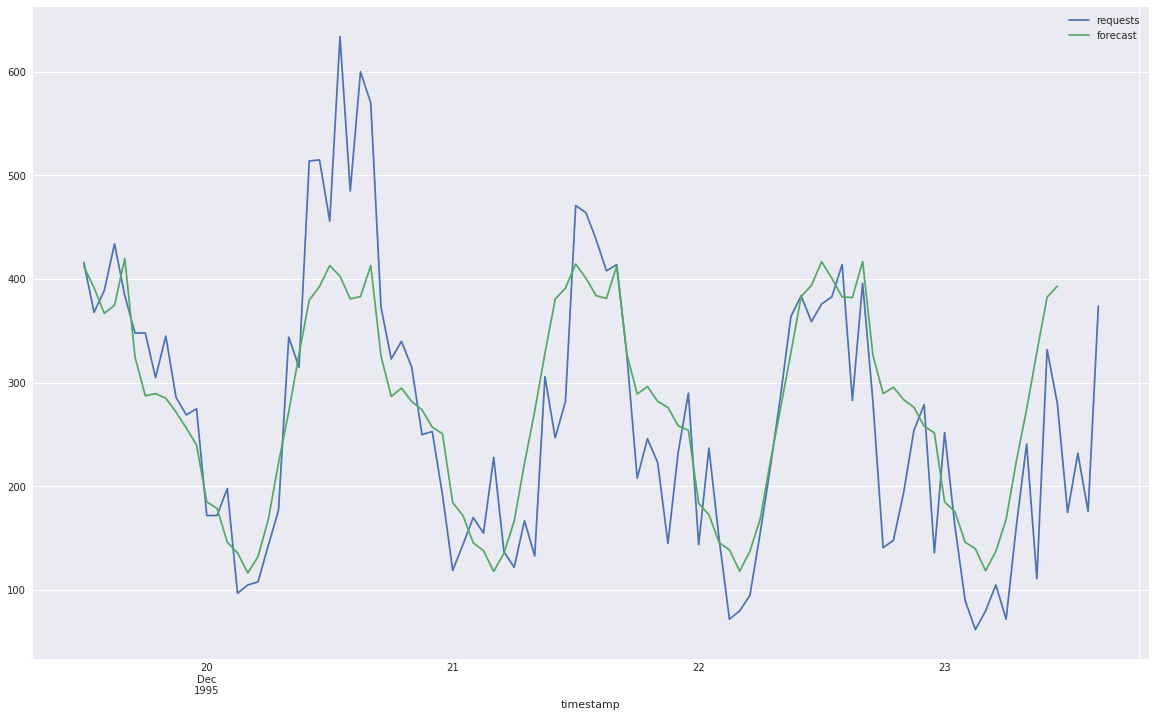

In [20]:
df['forecast'] = results.predict(start = 4800, end= 4900, dynamic= True)  
df[['requests', 'forecast']][-300:-200].plot(figsize=(20, 12))

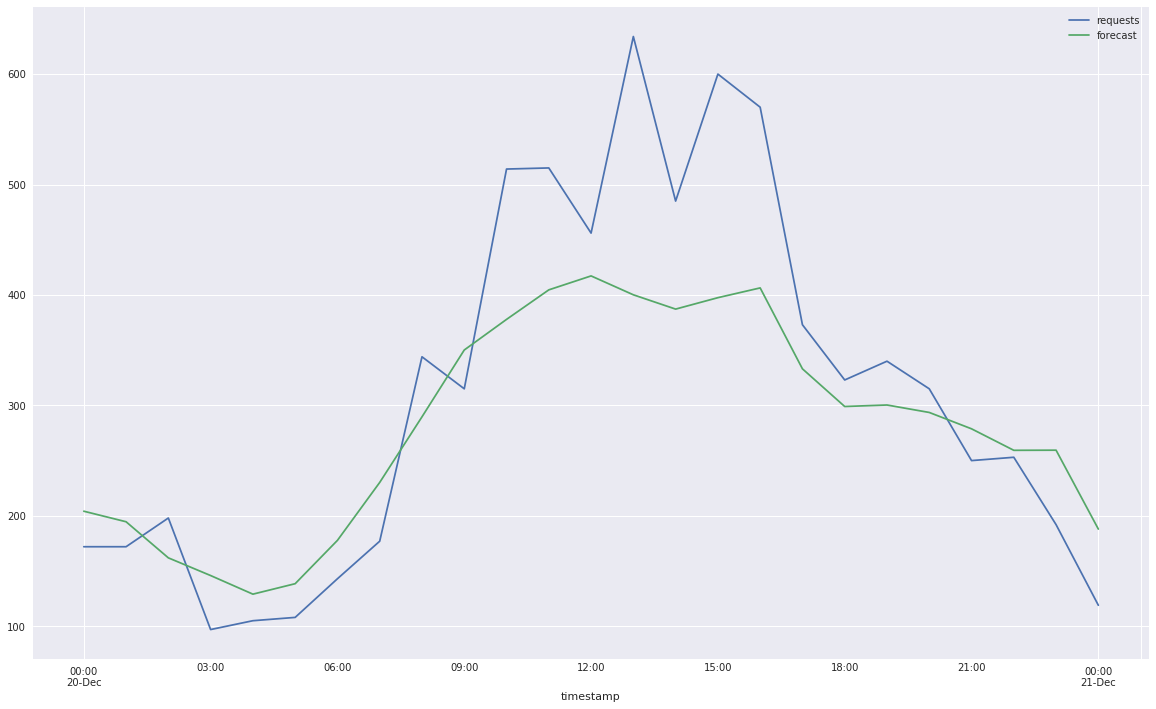

In [36]:
df['forecast'] = results.predict(start = 4817, end= 4841, dynamic= True)  
df[['requests', 'forecast']][-288:-263].plot(figsize=(20, 12))

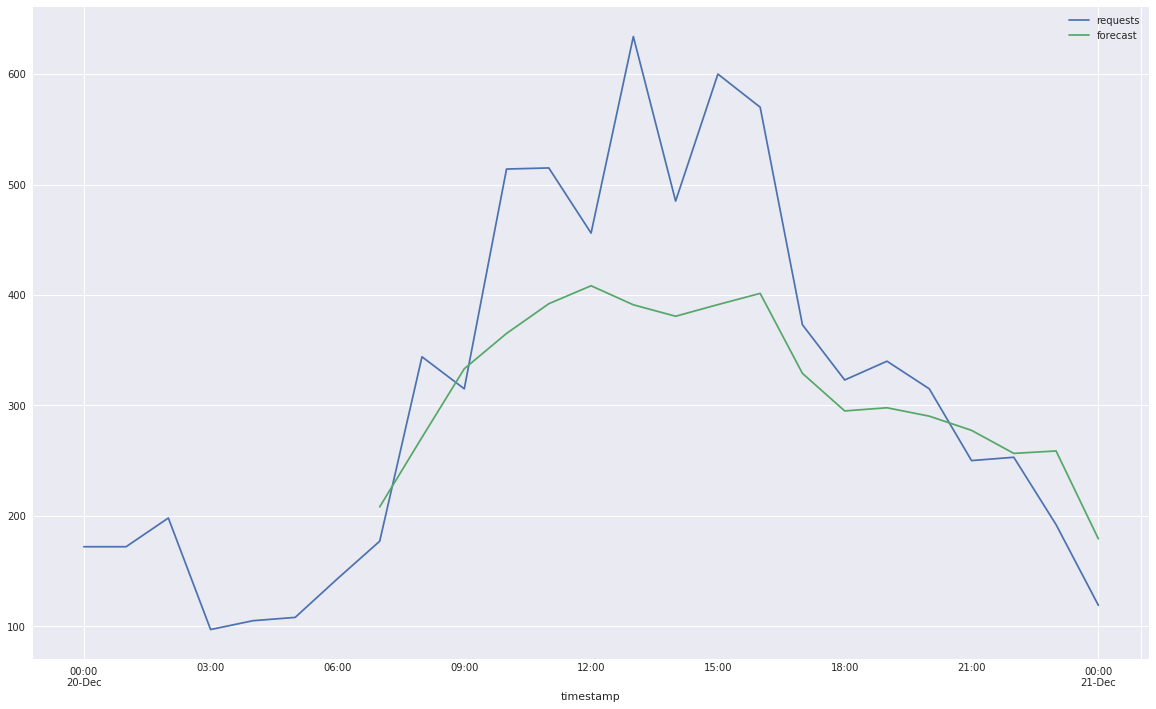

In [39]:
df['forecast'] = results.predict(start = 4824, end= 4841, dynamic= True)  
df[['requests', 'forecast']][-288:-263].plot(figsize=(20, 12))

In [44]:
mod = sm.tsa.statespace.SARIMAX(df.requests, trend='n', order=(6,1,2), seasonal_order=(0,1,0,24))
results = mod.fit()
print(results.summary())

/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                           requests   No. Observations:                 5105
Model:             SARIMAX(6, 1, 2)x(0, 1, 0, 24)   Log Likelihood              -30032.032
Date:                            Tue, 19 Jun 2018   AIC                          60082.065
Time:                                    12:21:46   BIC                          60140.863
Sample:                                         0   HQIC                         60102.656
                                           - 5105                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7114      0.012    -58.689      0.000      -0.735      -0.688
ar.L2          0.3928      0.016   

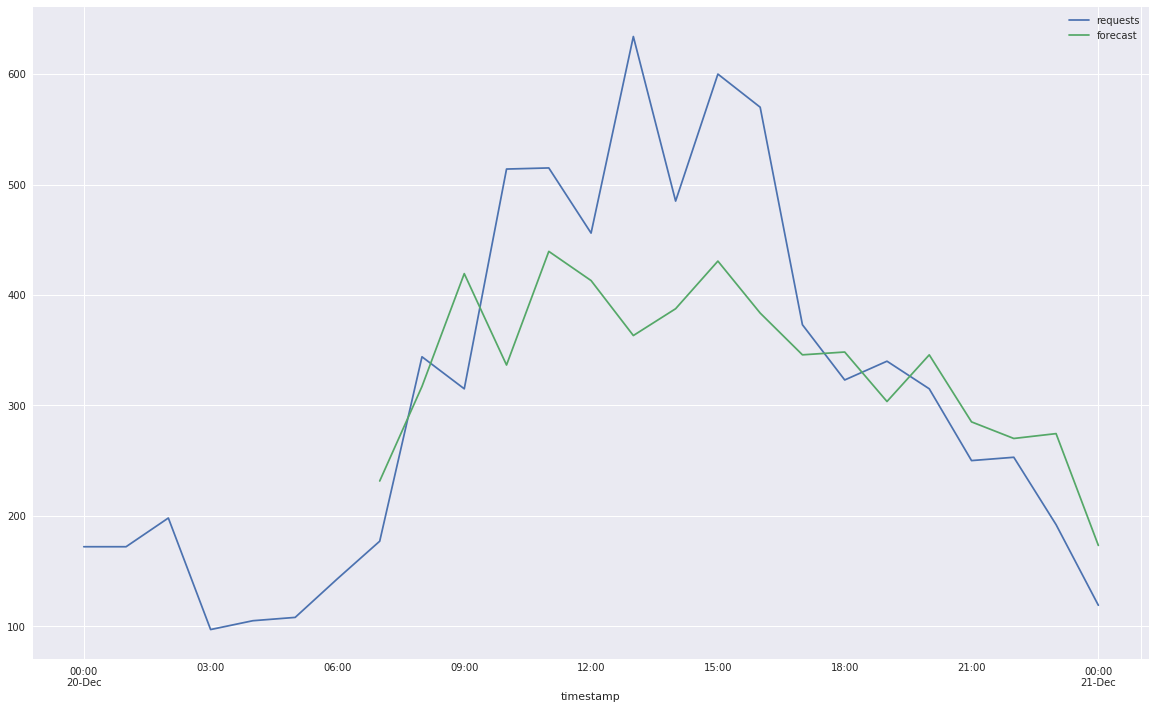

In [45]:
df['forecast'] = results.predict(start = 4824, end= 4841, dynamic= True)  
df[['requests', 'forecast']][-288:-263].plot(figsize=(20, 12))

In [47]:
mod = sm.tsa.statespace.SARIMAX(df.requests, trend='n', order=(6,1,2), seasonal_order=(1,1,0,24))
results = mod.fit()
print(results.summary())

/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                           requests   No. Observations:                 5105
Model:             SARIMAX(6, 1, 2)x(1, 1, 0, 24)   Log Likelihood              -29496.986
Date:                            Tue, 19 Jun 2018   AIC                          59013.972
Time:                                    12:24:28   BIC                          59079.303
Sample:                                         0   HQIC                         59036.851
                                           - 5105                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6738      0.012    -56.270      0.000      -0.697      -0.650
ar.L2          0.4743      0.015   

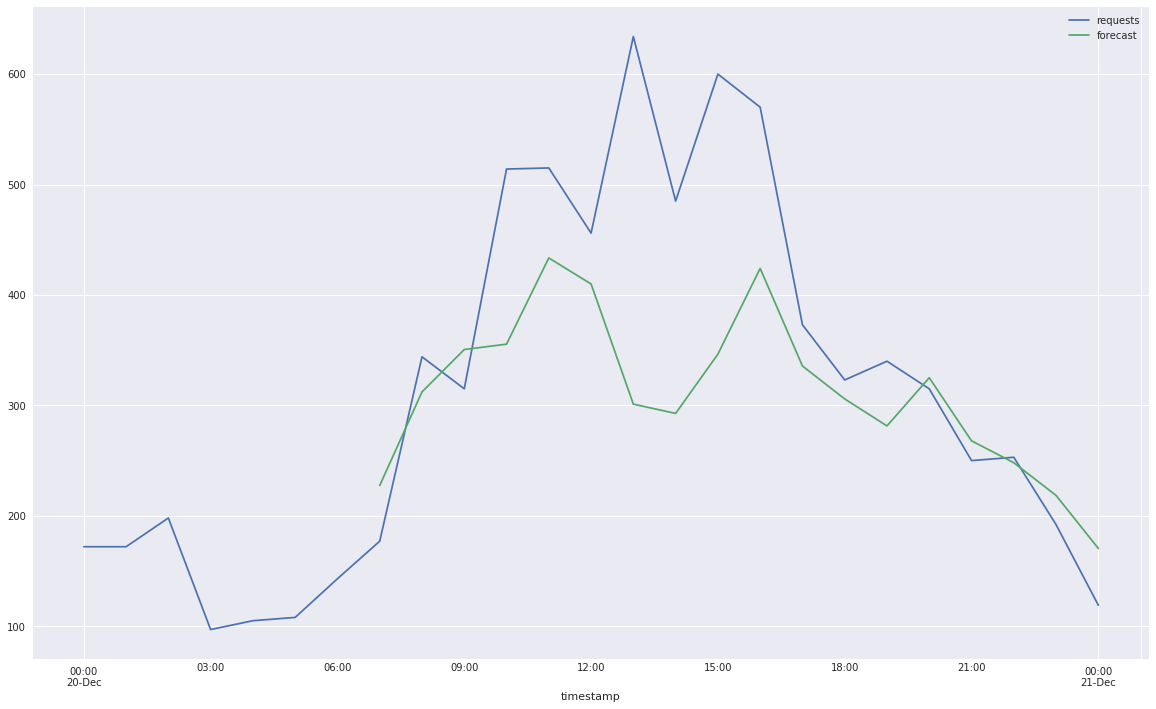

In [48]:
df['forecast'] = results.predict(start = 4824, end= 4841, dynamic= True)  
df[['requests', 'forecast']][-288:-263].plot(figsize=(20, 12))

In [49]:
mod = sm.tsa.statespace.SARIMAX(df.requests, trend='n', order=(6,1,2), seasonal_order=(2,1,0,24))
results = mod.fit()
print(results.summary())

/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                           requests   No. Observations:                 5105
Model:             SARIMAX(6, 1, 2)x(2, 1, 0, 24)   Log Likelihood              -29254.284
Date:                            Tue, 19 Jun 2018   AIC                          58530.568
Time:                                    12:29:45   BIC                          58602.432
Sample:                                         0   HQIC                         58555.735
                                           - 5105                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6582      0.012    -54.601      0.000      -0.682      -0.635
ar.L2          0.4911      0.015   

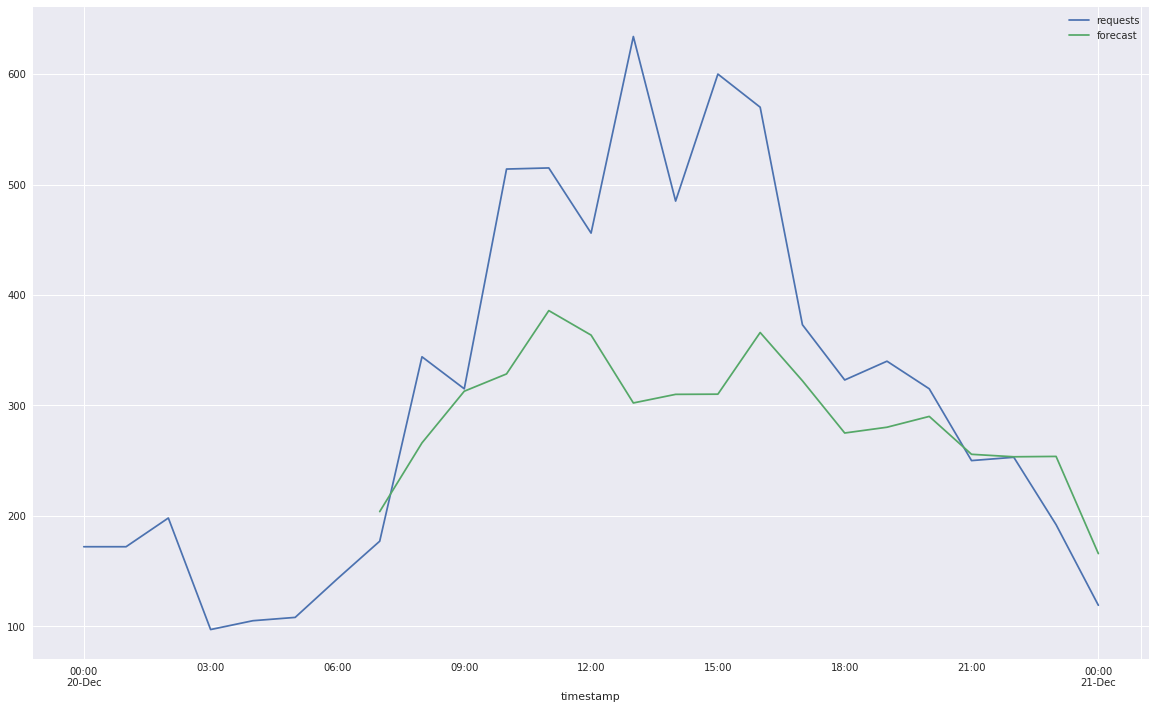

In [50]:
df['forecast'] = results.predict(start = 4824, end= 4841, dynamic= True)  
df[['requests', 'forecast']][-288:-263].plot(figsize=(20, 12))

In [51]:
mod = sm.tsa.statespace.SARIMAX(df.requests, trend='n', order=(6,1,2), seasonal_order=(1,1,1,24))
results = mod.fit()
print(results.summary())

/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                           requests   No. Observations:                 5105
Model:             SARIMAX(6, 1, 2)x(1, 1, 1, 24)   Log Likelihood              -28851.155
Date:                            Tue, 19 Jun 2018   AIC                          57724.309
Time:                                    12:38:03   BIC                          57796.173
Sample:                                         0   HQIC                         57749.476
                                           - 5105                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6303      0.012    -54.087      0.000      -0.653      -0.607
ar.L2          0.5405      0.014   

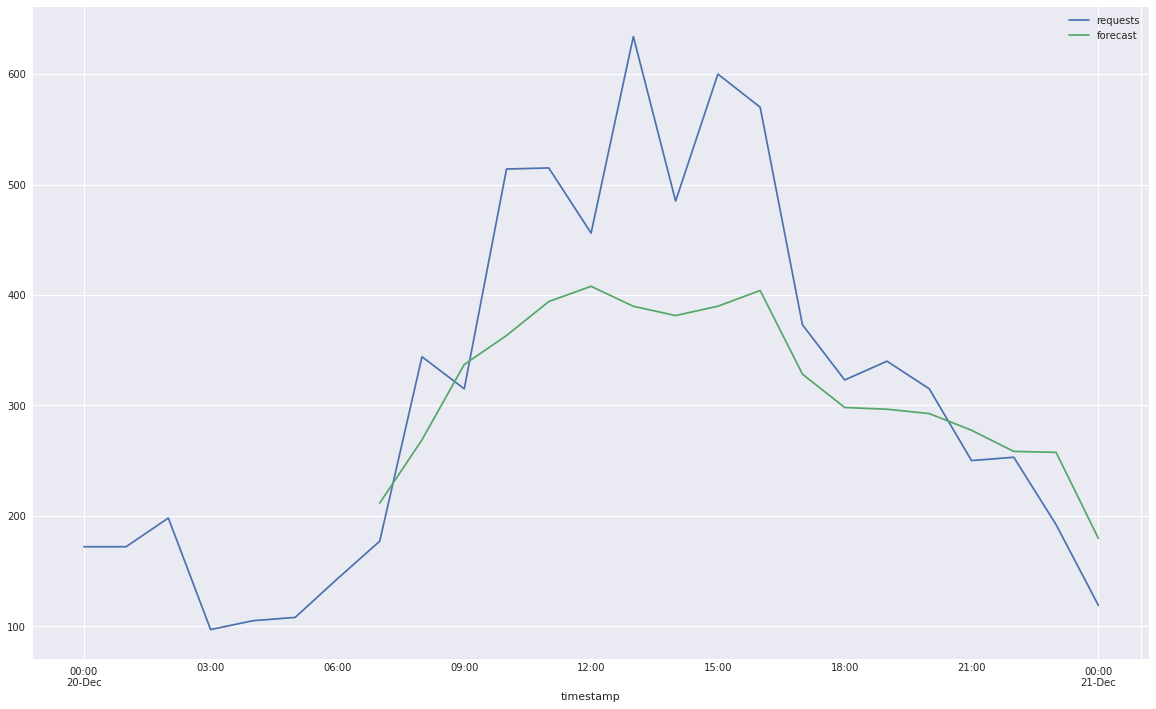

In [52]:
df['forecast'] = results.predict(start = 4824, end= 4841, dynamic= True)  
df[['requests', 'forecast']][-288:-263].plot(figsize=(20, 12))

In [53]:
mod = sm.tsa.statespace.SARIMAX(df.requests, trend='n', order=(2,1,2), seasonal_order=(1,1,0,24))
results = mod.fit()
print(results.summary())

/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                           requests   No. Observations:                 5105
Model:             SARIMAX(2, 1, 2)x(1, 1, 0, 24)   Log Likelihood              -29526.699
Date:                            Tue, 19 Jun 2018   AIC                          59065.399
Time:                                    12:47:21   BIC                          59104.597
Sample:                                         0   HQIC                         59079.126
                                           - 5105                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9120      0.032     28.373      0.000       0.849       0.975
ar.L2         -0.0211      0.021   

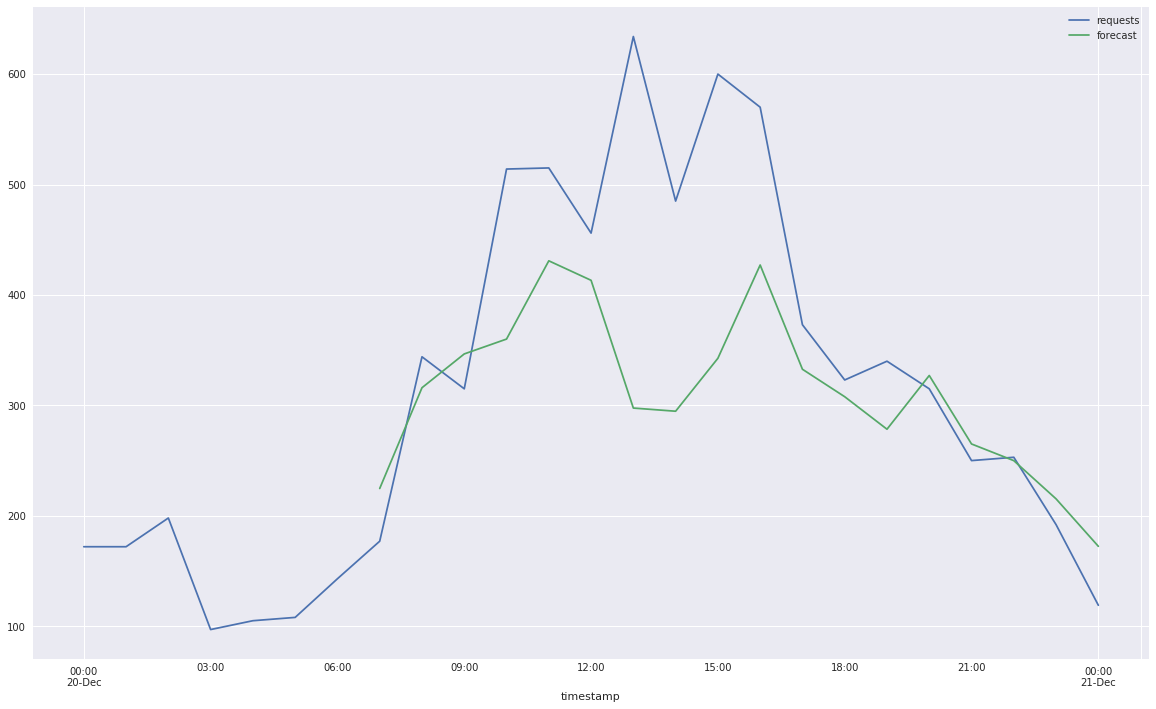

In [54]:
df['forecast'] = results.predict(start = 4824, end= 4841, dynamic= True)  
df[['requests', 'forecast']][-288:-263].plot(figsize=(20, 12))

In [55]:
mod = sm.tsa.statespace.SARIMAX(df.requests, trend='n', order=(3,1,2), seasonal_order=(1,1,0,24))
results = mod.fit()
print(results.summary())

/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                           requests   No. Observations:                 5105
Model:             SARIMAX(3, 1, 2)x(1, 1, 0, 24)   Log Likelihood              -29529.013
Date:                            Tue, 19 Jun 2018   AIC                          59072.027
Time:                                    12:49:17   BIC                          59117.758
Sample:                                         0   HQIC                         59088.042
                                           - 5105                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8712      0.052     16.830      0.000       0.770       0.973
ar.L2         -0.0077      0.022   

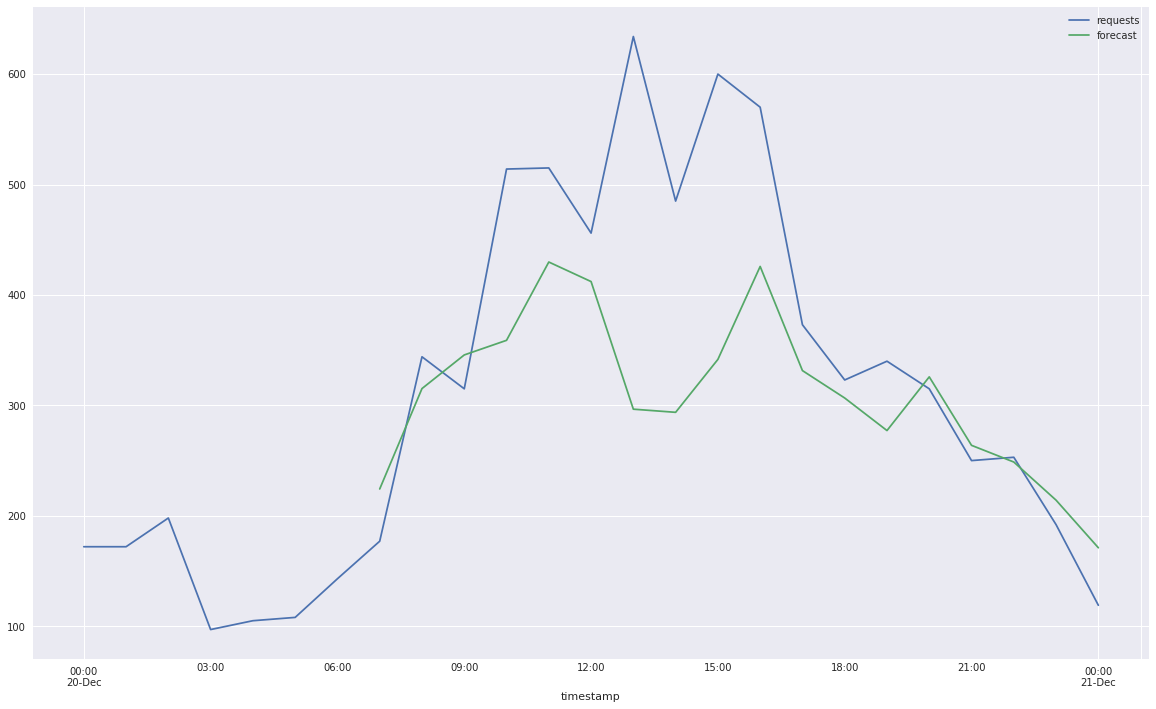

In [56]:
df['forecast'] = results.predict(start = 4824, end= 4841, dynamic= True)  
df[['requests', 'forecast']][-288:-263].plot(figsize=(20, 12))

In [57]:
mod = sm.tsa.statespace.SARIMAX(df.requests, trend='n', order=(4,1,2), seasonal_order=(1,1,0,24))
results = mod.fit()
print(results.summary())

/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                           requests   No. Observations:                 5105
Model:             SARIMAX(4, 1, 2)x(1, 1, 0, 24)   Log Likelihood              -29550.101
Date:                            Tue, 19 Jun 2018   AIC                          59116.201
Time:                                    13:05:02   BIC                          59168.466
Sample:                                         0   HQIC                         59134.504
                                           - 5105                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3714      0.131     -2.825      0.005      -0.629      -0.114
ar.L2          0.4006      0.046   

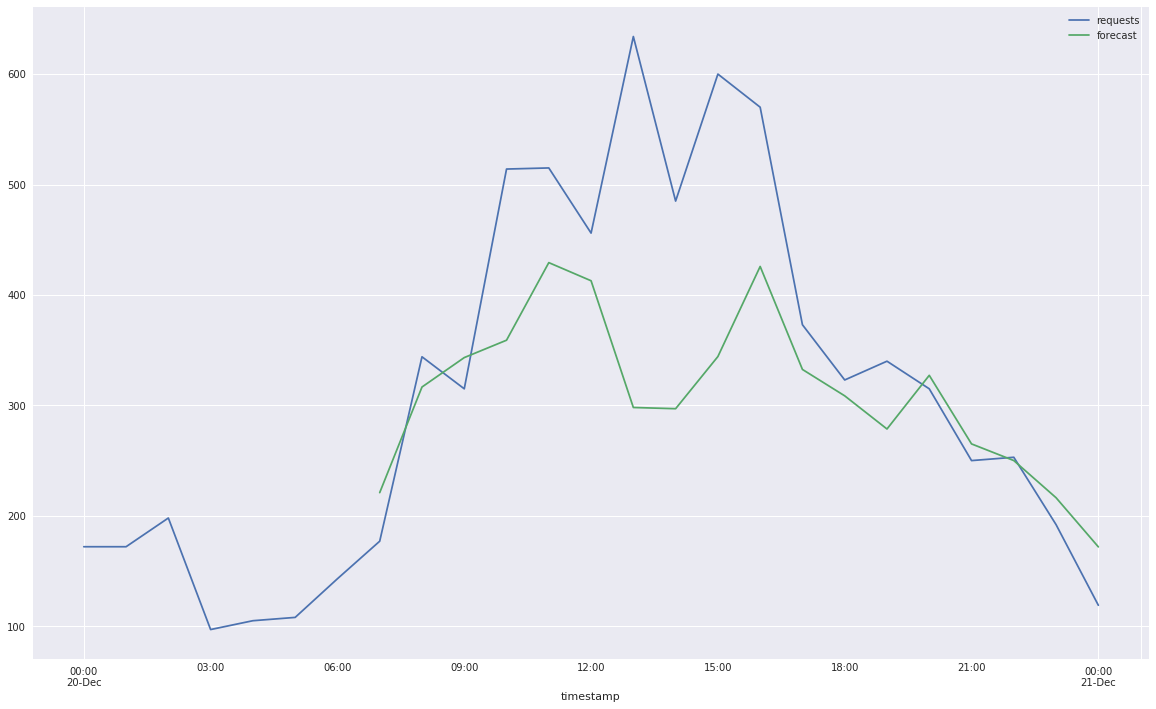

In [58]:
df['forecast'] = results.predict(start = 4824, end= 4841, dynamic= True)  
df[['requests', 'forecast']][-288:-263].plot(figsize=(20, 12))

In [59]:
mod = sm.tsa.statespace.SARIMAX(df.requests, trend='n', order=(4,1,2), seasonal_order=(1,1,0,24))
results = mod.fit()
print(results.summary())

/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                           requests   No. Observations:                 5105
Model:             SARIMAX(4, 1, 2)x(1, 1, 0, 24)   Log Likelihood              -29550.101
Date:                            Tue, 19 Jun 2018   AIC                          59116.201
Time:                                    13:21:00   BIC                          59168.466
Sample:                                         0   HQIC                         59134.504
                                           - 5105                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3714      0.131     -2.825      0.005      -0.629      -0.114
ar.L2          0.4006      0.046   

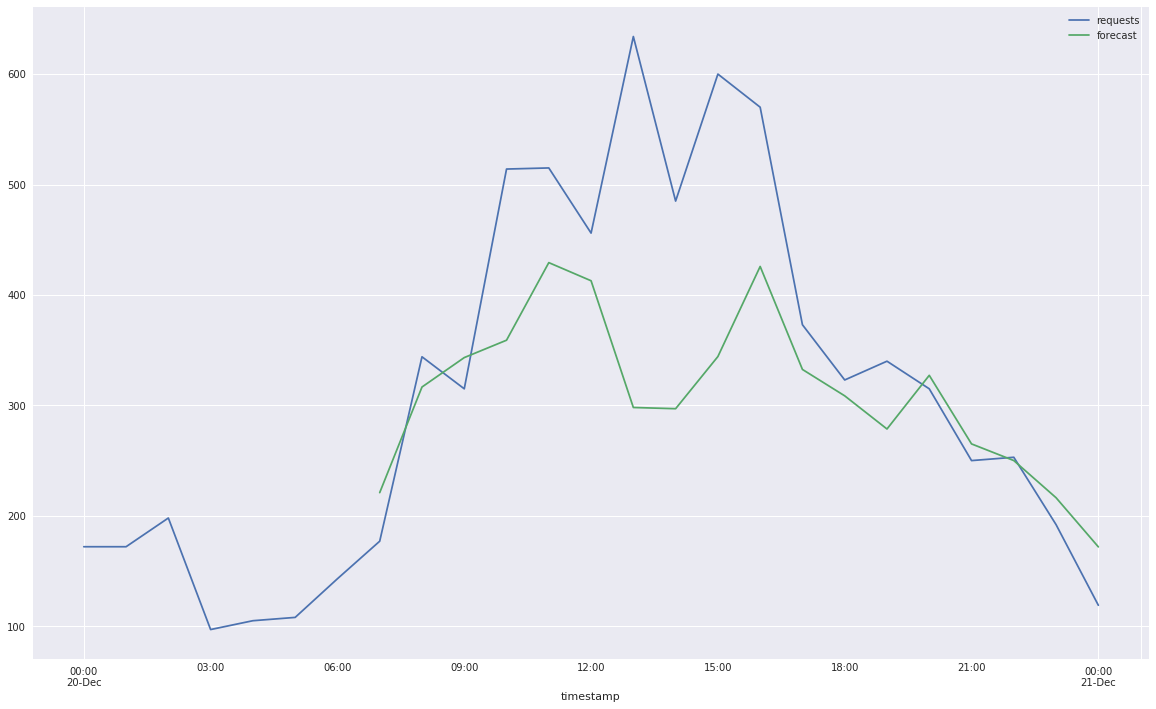

In [60]:
df['forecast'] = results.predict(start = 4824, end= 4841, dynamic= True)  
df[['requests', 'forecast']][-288:-263].plot(figsize=(20, 12))

In [63]:
mod = sm.tsa.statespace.SARIMAX(df.requests, trend='n', order=(1,1,2), seasonal_order=(1,1,0,24))
results = mod.fit()
print(results.summary())

/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                           requests   No. Observations:                 5105
Model:             SARIMAX(1, 1, 2)x(1, 1, 0, 24)   Log Likelihood              -29527.091
Date:                            Tue, 19 Jun 2018   AIC                          59064.183
Time:                                    13:31:10   BIC                          59096.848
Sample:                                         0   HQIC                         59075.622
                                           - 5105                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8820      0.010     85.640      0.000       0.862       0.902
ma.L1         -1.5768      0.023   

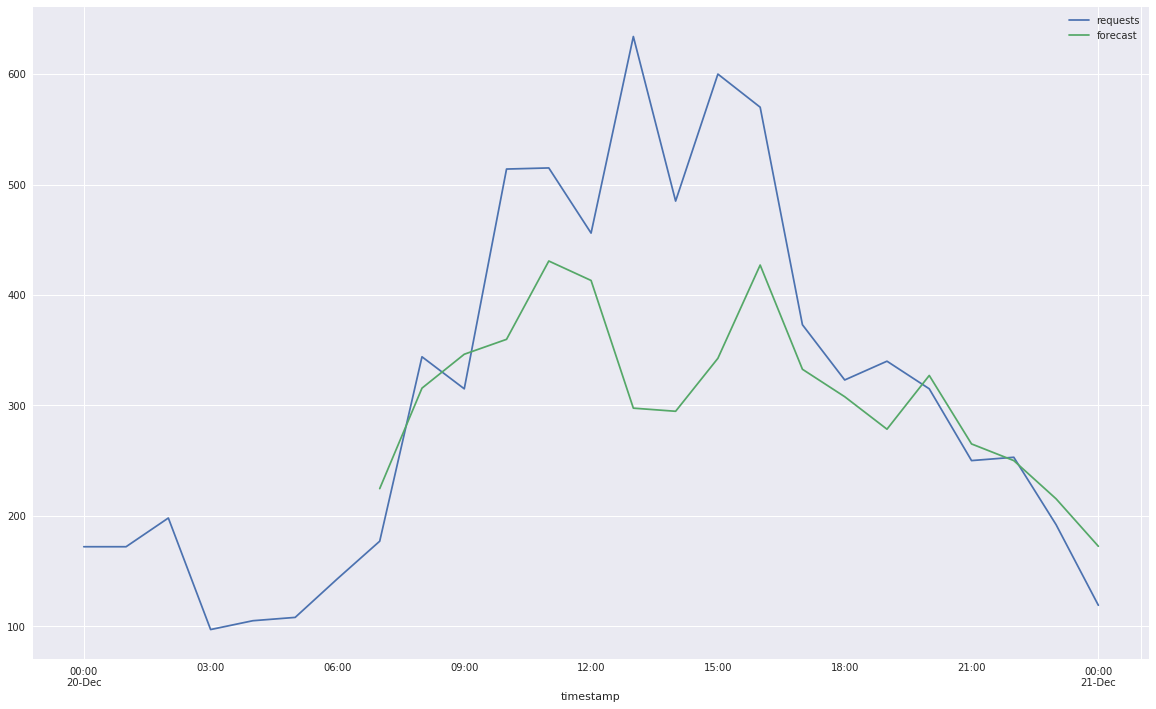

In [64]:
df['forecast'] = results.predict(start = 4824, end= 4841, dynamic= True)  
df[['requests', 'forecast']][-288:-263].plot(figsize=(20, 12))

In [65]:
mod = sm.tsa.statespace.SARIMAX(df.requests, trend='n', order=(1,1,1), seasonal_order=(1,1,0,24))
results = mod.fit()
print(results.summary())

/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                           requests   No. Observations:                 5105
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 24)   Log Likelihood              -29618.080
Date:                            Tue, 19 Jun 2018   AIC                          59244.160
Time:                                    13:32:33   BIC                          59270.292
Sample:                                         0   HQIC                         59253.312
                                           - 5105                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1621      0.016     10.240      0.000       0.131       0.193
ma.L1         -0.8063      0.010   

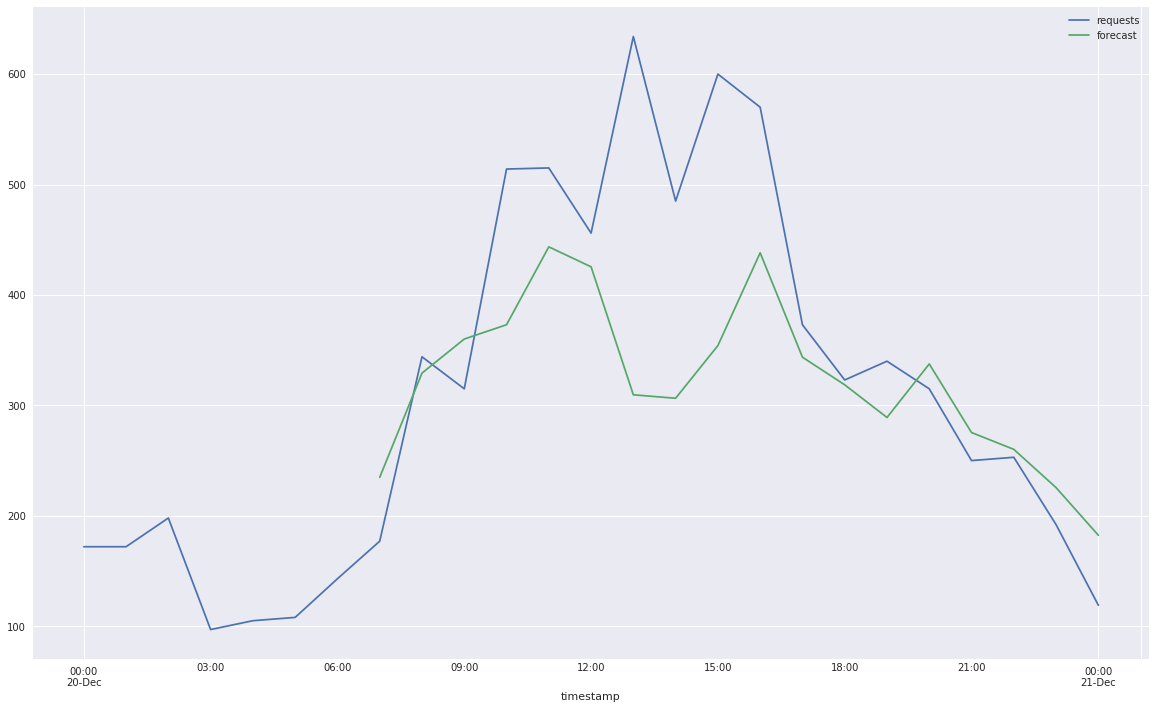

In [66]:
df['forecast'] = results.predict(start = 4824, end= 4841, dynamic= True)  
df[['requests', 'forecast']][-288:-263].plot(figsize=(20, 12))

In [67]:
mod2 = sm.tsa.statespace.SARIMAX(df.requests, trend='n', order=(1,1,1), seasonal_order=(1,1,1,24))
results2 = mod.fit()
print(results2.summary())

/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                           requests   No. Observations:                 5105
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 24)   Log Likelihood              -29618.080
Date:                            Tue, 19 Jun 2018   AIC                          59244.160
Time:                                    13:34:11   BIC                          59270.292
Sample:                                         0   HQIC                         59253.312
                                           - 5105                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1621      0.016     10.240      0.000       0.131       0.193
ma.L1         -0.8063      0.010   

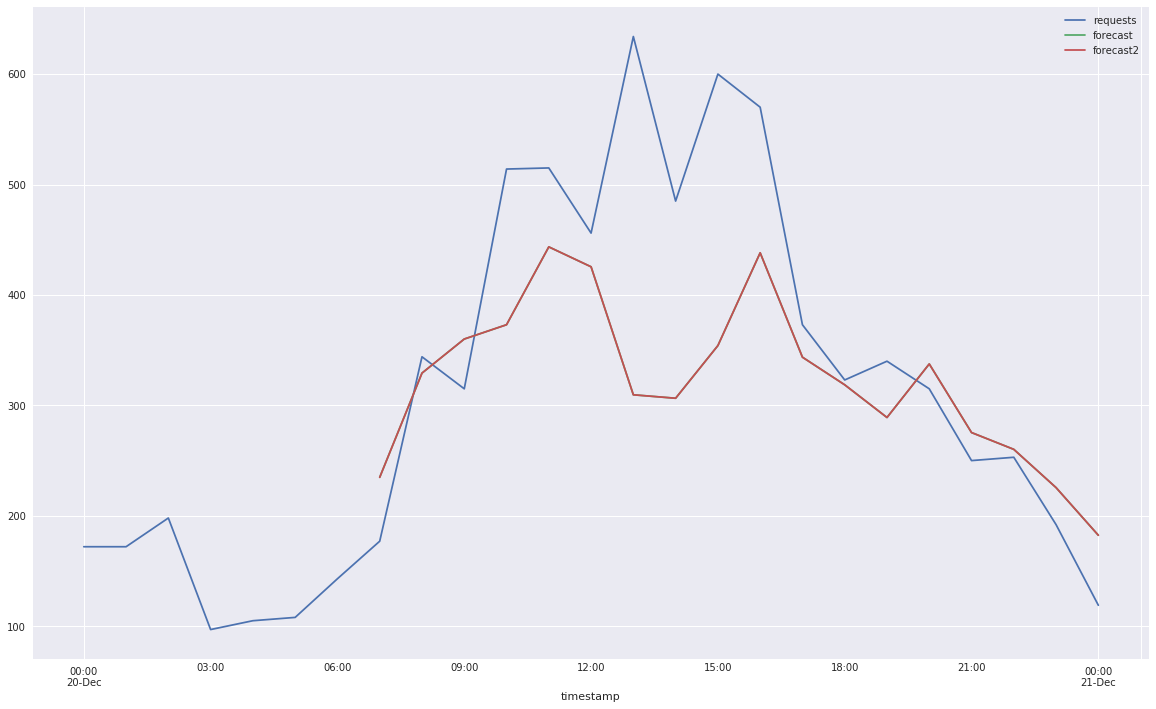

In [68]:
df['forecast2'] = results2.predict(start = 4824, end= 4841, dynamic= True)  
df[['requests', 'forecast','forecast2']][-288:-263].plot(figsize=(20, 12))

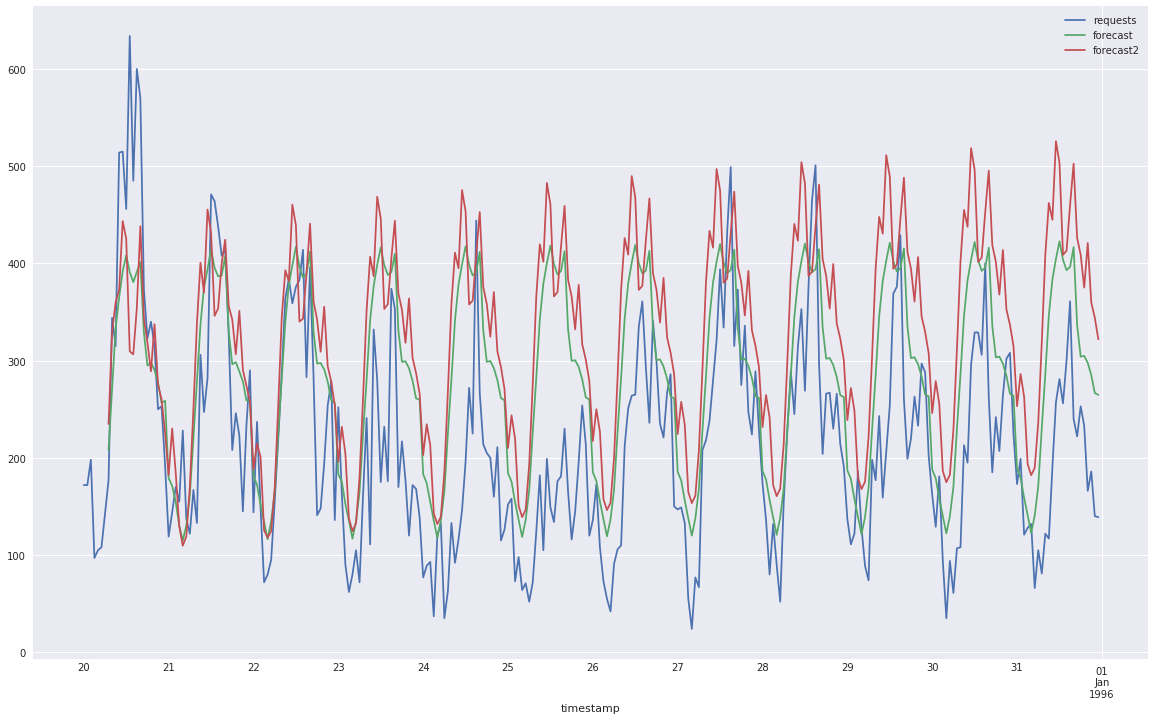

In [72]:
df['forecast'] = results.predict(start = 4824, end= 5104, dynamic= True)  
df['forecast2'] = results2.predict(start = 4824, end= 5104, dynamic= True)  
df[['requests', 'forecast','forecast2']][-288:].plot(figsize=(20, 12))

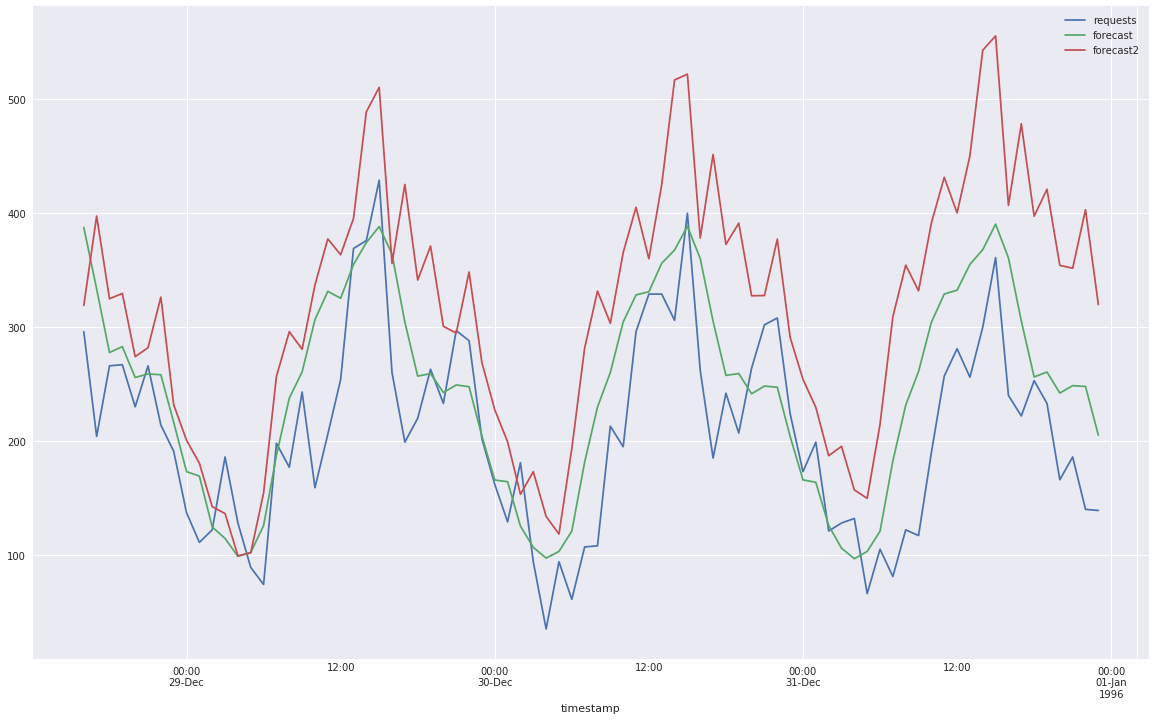

In [71]:
df['forecast'] = results.predict(start = 5024, end= 5104, dynamic= True)  
df['forecast2'] = results2.predict(start = 5024, end= 5104, dynamic= True)  
df[['requests', 'forecast','forecast2']][-80:].plot(figsize=(20, 12))

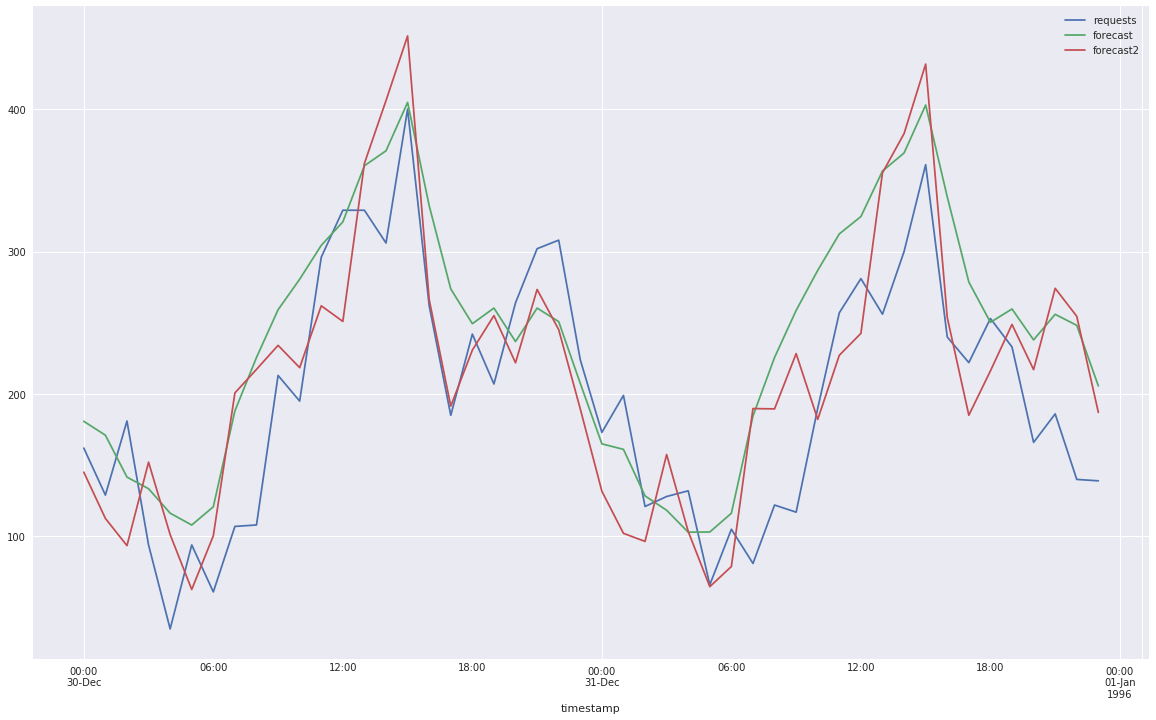

In [73]:
df['forecast'] = results.predict(start = 5056, end= 5104, dynamic= True)  
df['forecast2'] = results2.predict(start = 5056, end= 5104, dynamic= True)  
df[['requests', 'forecast','forecast2']][-48:].plot(figsize=(20, 12))

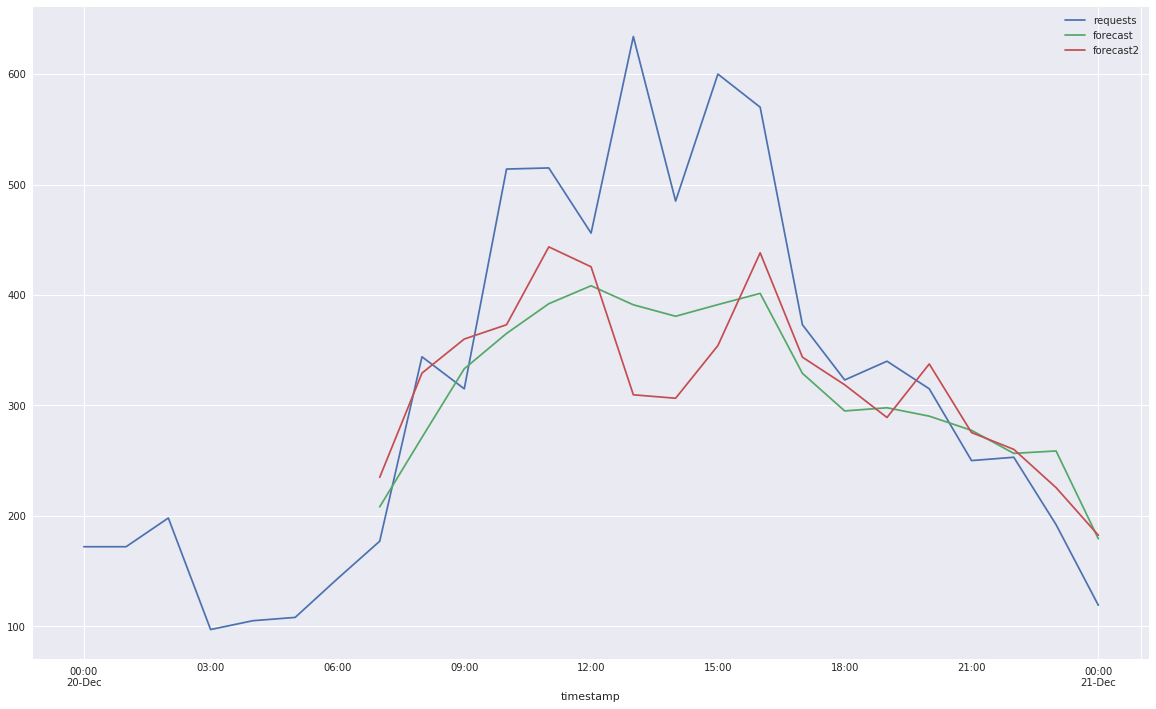

In [76]:
df['forecast'] = results.predict(start = 4824, end= 4841, dynamic= True)  
df['forecast2'] = results2.predict(start = 4824, end= 4841, dynamic= True)  
df[['requests', 'forecast','forecast2']][-288:-263].plot(figsize=(20, 12))

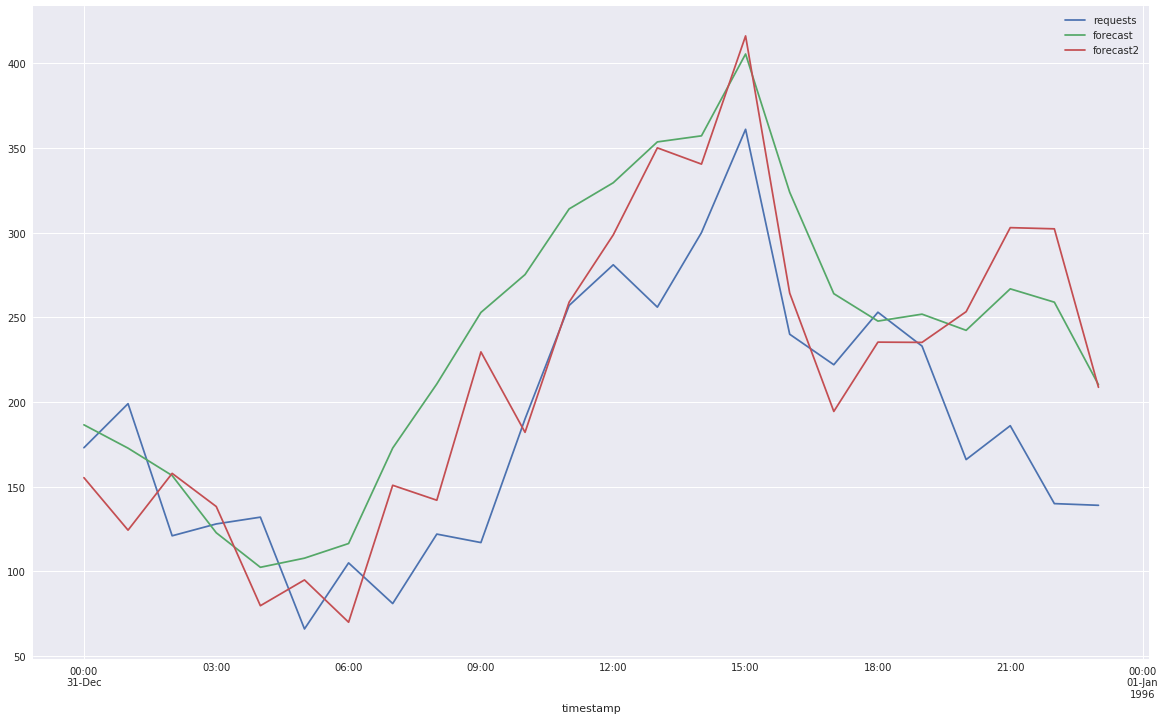

In [77]:
df['forecast'] = results.predict(start = 5080, end= 5104, dynamic= True)  
df['forecast2'] = results2.predict(start = 5080, end= 5104, dynamic= True)  
df[['requests', 'forecast','forecast2']][-24:].plot(figsize=(20, 12))

In [83]:
mod3 = sm.tsa.statespace.SARIMAX(df.requests, trend='n', order=(0,1,0), seasonal_order=(0,1,0,24))
results3 = mod3.fit()
print(results3.summary())

/home/filippo/.conda/envs/nilmtk-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                           requests   No. Observations:                 5105
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 24)   Log Likelihood              -31183.045
Date:                            Wed, 20 Jun 2018   AIC                          62368.090
Time:                                    12:13:28   BIC                          62374.623
Sample:                                         0   HQIC                         62370.378
                                           - 5105                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.257e+04    166.696     75.395      0.000    1.22e+04    1.29e+04
Ljung-Box (Q):                     

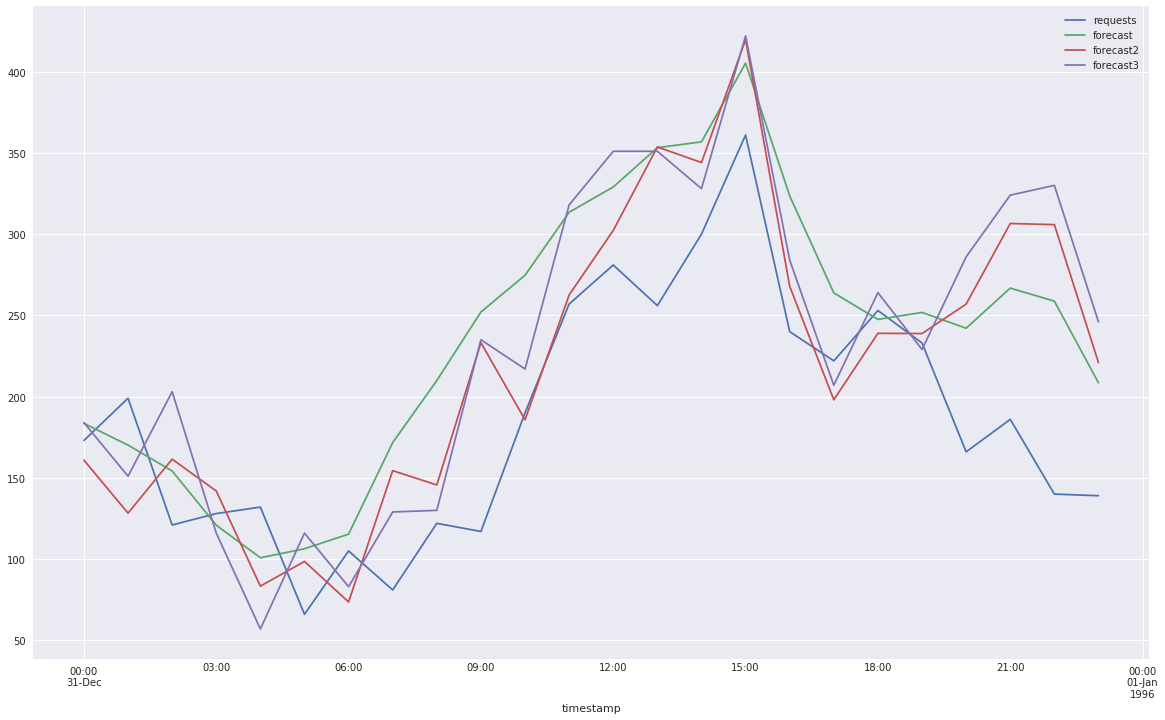

In [84]:
df['forecast'] = results.predict(start = 5081, end= 5104, dynamic= True)  
df['forecast2'] = results2.predict(start = 5081, end= 5104, dynamic= True)  
df['forecast3'] = results3.predict(start = 5081, end= 5104, dynamic= True) 
df[['requests', 'forecast','forecast2','forecast3']][-24:].plot(figsize=(20, 12))

In [89]:
df.requests.head()

timestamp
1995-06-01 00:00:00    65
1995-06-01 01:00:00    16
1995-06-01 02:00:00    37
1995-06-01 03:00:00    76
1995-06-01 04:00:00    57
Name: requests, dtype: int64